In [70]:
#### Imports ####

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install causality
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install decorator>=4.1.2
!{sys.executable} -m pip install networkx>=2.0
!{sys.executable} -m pip install numpy>=1.13.3
!{sys.executable} -m pip install pandas>=0.20.3
!{sys.executable} -m pip install patsy>=0.4.1
!{sys.executable} -m pip install python-dateutil>=2.6.1
!{sys.executable} -m pip install pytz>=2017.2
!{sys.executable} -m pip install scipy>=0.19.1
!{sys.executable} -m pip install six>=1.11.0
!{sys.executable} -m pip install statsmodels>=0.8.0

!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pycm


# causality imports
# IC Algorithm Tutorial: https://pypi.org/project/causality/
import numpy
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time


from causality.inference.search import IC
from causality.inference.independence_tests import RobustRegressionTest

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.metrics import confusion_matrix

from pycm import *


print('causality packages imported successfully')

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
causality packages imported successfully


In [85]:
def load_data_to_dataframe():
    # load the data into a dataframe:
    data_df = pd.read_csv('InSilicoSize10-Yeast3-nonoise-trajectories.tsv', sep='\t', header=0)
    data_df = data_df.drop(['Time'], axis=1)
    return data_df

yeast3_data_df = load_data_to_dataframe()
yeast3_data_df
    
def load_data_to_dataframe():
    # load the data into a dataframe:
    data_df = pd.read_csv('InSilicoSize10-Yeast2-nonoise-trajectories.tsv', sep='\t', header=0)
    data_df = data_df.drop(['Time'], axis=1)
    return data_df

yeast2_data_df = load_data_to_dataframe()
yeast2_data_df

def load_data_to_dataframe():
    # load the data into a dataframe:
    data_df = pd.read_csv('InSilicoSize10-Yeast1-nonoise-trajectories.tsv', sep='\t', header=0)
    data_df = data_df.drop(['Time'], axis=1)
    return data_df

yeast1_data_df = load_data_to_dataframe()
yeast1_data_df

def load_data_to_dataframe():
    # load the data into a dataframe:
    data_df = pd.read_csv('InSilicoSize10-Ecoli1-nonoise-trajectories.tsv', sep='\t', header=0)
    data_df = data_df.drop(['Time'], axis=1)
    return data_df

ecoli1_data_df = load_data_to_dataframe()
ecoli1_data_df

def load_data_to_dataframe():
    # load the data into a dataframe:
    data_df = pd.read_csv('InSilicoSize10-Ecoli2-nonoise-trajectories.tsv', sep='\t', header=0)
    data_df = data_df.drop(['Time'], axis=1)
    return data_df

ecoli2_data_df = load_data_to_dataframe()
ecoli2_data_df

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
0,0.977810,0.890699,0.314776,0.913740,0.990049,0.233521,0.984463,0.652573,0.558600,0.747473
1,0.908569,0.804960,0.301375,0.850622,0.871873,0.354209,0.597520,0.587207,0.676013,0.817051
2,0.849795,0.740435,0.290248,0.798705,0.780615,0.455891,0.380882,0.534411,0.762194,0.867446
3,0.799904,0.691864,0.280996,0.755968,0.709997,0.541561,0.260797,0.491939,0.825451,0.903935
4,0.757555,0.655290,0.273291,0.720753,0.655323,0.613739,0.195486,0.457932,0.871881,0.930341
...,...,...,...,...,...,...,...,...,...,...
79,0.510037,0.543340,0.254709,0.558728,0.476937,0.943312,0.175690,0.355065,0.997761,0.996301
80,0.511503,0.543012,0.250294,0.557723,0.476089,0.952206,0.175354,0.351908,0.998357,0.996604
81,0.512748,0.542772,0.246671,0.556890,0.475411,0.959699,0.175065,0.349322,0.998794,0.996816
82,0.513804,0.542595,0.243697,0.556200,0.474867,0.966012,0.174815,0.347203,0.999115,0.996963


In [92]:
columns_list = []
number_of_columns = 0

def columns_to_list(data_df):
    # Save headers/column names to a list
    columns_list = list(data_df.columns)
    
    return columns_list

def column_length(columns_list):
    # Save the number of columns/headers present in the dataset
    number_of_columns = len(columns_list)
    print(number_of_columns)
    
    return number_of_columns

columns_list_yeast3 = columns_to_list(yeast3_data_df) 
number_of_columns_yeast3 = column_length(columns_list_yeast3)

print(number_of_columns_yeast3)

columns_list_yeast2 = columns_to_list(yeast2_data_df) 
number_of_columns_yeast2 = column_length(columns_list_yeast2)

print(number_of_columns_yeast2)

columns_list_yeast1 = columns_to_list(yeast1_data_df) 
number_of_columns_yeast1 = column_length(columns_list_yeast1)

print(number_of_columns_yeast1)


columns_list_ecoli2 = columns_to_list(ecoli2_data_df) 
number_of_columns_ecoli2 = column_length(columns_list_ecoli2)

print(number_of_columns_ecoli2)

columns_list_ecoli1 = columns_to_list(ecoli1_data_df) 
number_of_columns_ecoli1 = column_length(columns_list_ecoli1)

print(number_of_columns_ecoli1)

10
10
10
10
10
10
10
10
10
10


In [73]:
# Create a list of 'c's to denote continuous variables for the headers/columns/variables given in the dataset
c_list = []

def c_list_maker(n):
    c_list = ['c'] * n
    return c_list

c_value = c_list_maker(number_of_columns)

In [97]:
# Merge headers list and type of variable list
final_list = []

def column_value(columns_list, c_value):
    final_list = []
    for (item1, item2) in zip(columns_list, c_value):
        final_list.append(item1)
        final_list.append(item2)
    return final_list

final_list_yeast3 = column_value(columns_list_yeast3, c_value)
print(final_list_yeast3)

final_list_yeast2 = column_value(columns_list_yeast2, c_value)
print(final_list_yeast2)

final_list_yeast1 = column_value(columns_list_yeast1, c_value)
print(final_list_yeast1)

final_list_ecoli2 = column_value(columns_list_ecoli2, c_value)
print(final_list_ecoli2)

final_list_ecoli1 = column_value(columns_list_ecoli1, c_value)
print(final_list_ecoli1)

['G1', 'c', 'G2', 'c', 'G3', 'c', 'G4', 'c', 'G5', 'c', 'G6', 'c', 'G7', 'c', 'G8', 'c', 'G9', 'c', 'G10', 'c']
['G1', 'c', 'G2', 'c', 'G3', 'c', 'G4', 'c', 'G5', 'c', 'G6', 'c', 'G7', 'c', 'G8', 'c', 'G9', 'c', 'G10', 'c']
['G1', 'c', 'G2', 'c', 'G3', 'c', 'G4', 'c', 'G5', 'c', 'G6', 'c', 'G7', 'c', 'G8', 'c', 'G9', 'c', 'G10', 'c']
['G1', 'c', 'G2', 'c', 'G3', 'c', 'G4', 'c', 'G5', 'c', 'G6', 'c', 'G7', 'c', 'G8', 'c', 'G9', 'c', 'G10', 'c']
['G1', 'c', 'G2', 'c', 'G3', 'c', 'G4', 'c', 'G5', 'c', 'G6', 'c', 'G7', 'c', 'G8', 'c', 'G9', 'c', 'G10', 'c']


In [99]:
header_dct = {}

# Convert list to dictionary
def convert_list_to_dict(final_list):
    header_dct = {final_list[i]: final_list[1] for i in range(0, len(final_list), 2)}
    return header_dct

header_dct_yeast3 = convert_list_to_dict(final_list_yeast3)
# Check if converted correctly
print(header_dct_yeast3)

header_dct_yeast2 = convert_list_to_dict(final_list_yeast2)
# Check if converted correctly
print(header_dct_yeast2)


header_dct_yeast1 = convert_list_to_dict(final_list_yeast1)
# Check if converted correctly
print(header_dct_yeast1)

header_dct_ecoli2 = convert_list_to_dict(final_list_ecoli2)
# Check if converted correctly
print(header_dct_ecoli2)

header_dct_ecoli1 = convert_list_to_dict(final_list_ecoli1)
# Check if converted correctly
print(header_dct_ecoli1)

{'G1': 'c', 'G2': 'c', 'G3': 'c', 'G4': 'c', 'G5': 'c', 'G6': 'c', 'G7': 'c', 'G8': 'c', 'G9': 'c', 'G10': 'c'}
{'G1': 'c', 'G2': 'c', 'G3': 'c', 'G4': 'c', 'G5': 'c', 'G6': 'c', 'G7': 'c', 'G8': 'c', 'G9': 'c', 'G10': 'c'}
{'G1': 'c', 'G2': 'c', 'G3': 'c', 'G4': 'c', 'G5': 'c', 'G6': 'c', 'G7': 'c', 'G8': 'c', 'G9': 'c', 'G10': 'c'}
{'G1': 'c', 'G2': 'c', 'G3': 'c', 'G4': 'c', 'G5': 'c', 'G6': 'c', 'G7': 'c', 'G8': 'c', 'G9': 'c', 'G10': 'c'}
{'G1': 'c', 'G2': 'c', 'G3': 'c', 'G4': 'c', 'G5': 'c', 'G6': 'c', 'G7': 'c', 'G8': 'c', 'G9': 'c', 'G10': 'c'}


In [101]:
# Run the IC Search Algorithm
def run_IC(data_df, header_dct):
    
    # Check time Elapsed for IC Algorithm to run
    # Time in seconds
    start = time.time()
    
    # run the IC search
    ic_algorithm = IC(RobustRegressionTest)
    graph = ic_algorithm.search(data_df, header_dct)
    
    end = time.time()
    print(end - start)
    print("IC Algorithm successfully run")
    return graph
    
graph_yeast3 = run_IC(yeast3_data_df, header_dct_yeast3)
graph_yeast2 = run_IC(yeast2_data_df, header_dct_yeast2)
graph_yeast1 = run_IC(yeast3_data_df, header_dct_yeast1)
graph_ecoli2 = run_IC(yeast3_data_df, header_dct_ecoli2)
graph_ecoli1 = run_IC(yeast3_data_df, header_dct_ecoli1)

6.649773836135864
IC Algorithm successfully run
8.009706020355225
IC Algorithm successfully run
6.7366273403167725
IC Algorithm successfully run
6.452401876449585
IC Algorithm successfully run
6.756134033203125
IC Algorithm successfully run


In [102]:
graph_yeast3.edges(data=True)

EdgeDataView([('G1', 'G5', {'marked': False, 'arrows': ['G5']}), ('G2', 'G8', {'marked': False, 'arrows': ['G2']}), ('G2', 'G10', {'marked': False, 'arrows': ['G2', 'G10']}), ('G3', 'G9', {'marked': False, 'arrows': ['G9']}), ('G4', 'G5', {'marked': False, 'arrows': ['G5']}), ('G6', 'G9', {'marked': True, 'arrows': ['G6']}), ('G6', 'G10', {'marked': True, 'arrows': ['G6']}), ('G7', 'G8', {'marked': False, 'arrows': []}), ('G9', 'G10', {'marked': False, 'arrows': ['G9', 'G10']})])

In [104]:
graph_yeast2.edges(data=True)

EdgeDataView([('G1', 'G7', {'marked': False, 'arrows': ['G1', 'G7']}), ('G1', 'G8', {'marked': False, 'arrows': ['G1', 'G8']}), ('G1', 'G9', {'marked': False, 'arrows': ['G1', 'G1', 'G9', 'G9']}), ('G2', 'G5', {'marked': False, 'arrows': ['G2', 'G5']}), ('G2', 'G7', {'marked': True, 'arrows': ['G2', 'G2']}), ('G2', 'G10', {'marked': False, 'arrows': ['G2', 'G2', 'G10']}), ('G3', 'G4', {'marked': False, 'arrows': []}), ('G3', 'G10', {'marked': False, 'arrows': ['G10']}), ('G4', 'G10', {'marked': True, 'arrows': ['G4']}), ('G5', 'G9', {'marked': False, 'arrows': ['G5', 'G9']}), ('G6', 'G7', {'marked': False, 'arrows': ['G6', 'G7']}), ('G6', 'G8', {'marked': False, 'arrows': ['G6', 'G8']}), ('G6', 'G9', {'marked': False, 'arrows': ['G6', 'G6', 'G9']}), ('G7', 'G8', {'marked': False, 'arrows': []})])

In [105]:
graph_yeast1.edges(data=True)

EdgeDataView([('G1', 'G5', {'marked': False, 'arrows': ['G5']}), ('G2', 'G8', {'marked': False, 'arrows': ['G2']}), ('G2', 'G10', {'marked': False, 'arrows': ['G2', 'G10']}), ('G3', 'G9', {'marked': False, 'arrows': ['G9']}), ('G4', 'G5', {'marked': False, 'arrows': ['G5']}), ('G6', 'G9', {'marked': True, 'arrows': ['G6']}), ('G6', 'G10', {'marked': True, 'arrows': ['G6']}), ('G7', 'G8', {'marked': False, 'arrows': []}), ('G9', 'G10', {'marked': False, 'arrows': ['G9', 'G10']})])

In [106]:
graph_ecoli2.edges(data=True)

EdgeDataView([('G1', 'G5', {'marked': False, 'arrows': ['G5']}), ('G2', 'G8', {'marked': False, 'arrows': ['G2']}), ('G2', 'G10', {'marked': False, 'arrows': ['G2', 'G10']}), ('G3', 'G9', {'marked': False, 'arrows': ['G9']}), ('G4', 'G5', {'marked': False, 'arrows': ['G5']}), ('G6', 'G9', {'marked': True, 'arrows': ['G6']}), ('G6', 'G10', {'marked': True, 'arrows': ['G6']}), ('G7', 'G8', {'marked': False, 'arrows': []}), ('G9', 'G10', {'marked': False, 'arrows': ['G9', 'G10']})])

In [107]:
graph_ecoli1.edges(data=True)

EdgeDataView([('G1', 'G5', {'marked': False, 'arrows': ['G5']}), ('G2', 'G8', {'marked': False, 'arrows': ['G2']}), ('G2', 'G10', {'marked': False, 'arrows': ['G2', 'G10']}), ('G3', 'G9', {'marked': False, 'arrows': ['G9']}), ('G4', 'G5', {'marked': False, 'arrows': ['G5']}), ('G6', 'G9', {'marked': True, 'arrows': ['G6']}), ('G6', 'G10', {'marked': True, 'arrows': ['G6']}), ('G7', 'G8', {'marked': False, 'arrows': []}), ('G9', 'G10', {'marked': False, 'arrows': ['G9', 'G10']})])

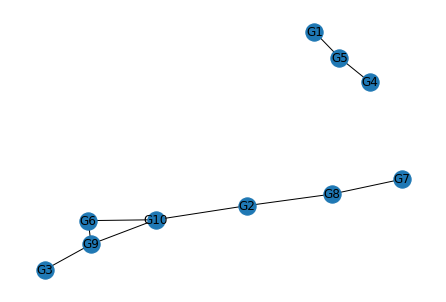

In [108]:
nx.draw(graph_yeast3, with_labels=True)

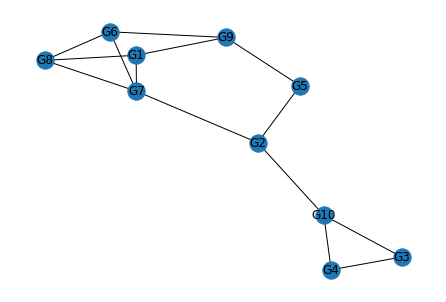

In [110]:
nx.draw(graph_yeast2, with_labels=True)

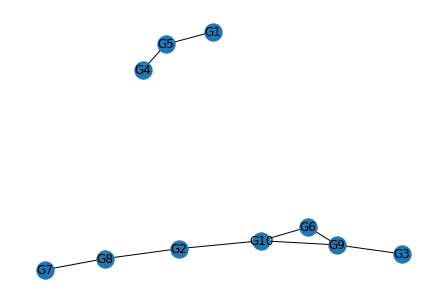

In [111]:
nx.draw(graph_yeast1, with_labels=True)

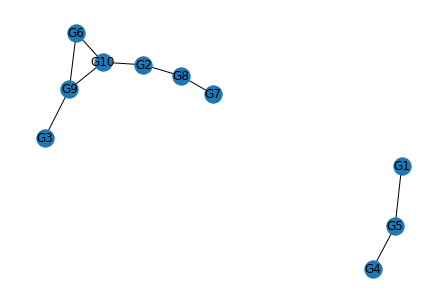

In [112]:
nx.draw(graph_ecoli2, with_labels=True)

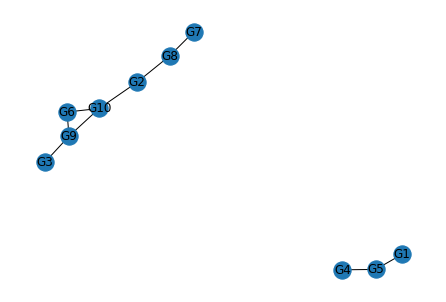

In [109]:
nx.draw(graph_ecoli1, with_labels=True)

In [113]:
predicted_adjMatrix_yeast3 = nx.adjacency_matrix(graph_yeast3)

print(predicted_adjMatrix_yeast3.todense())

[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 0 0 1 0]]


In [114]:
predicted_adjMatrix_yeast2 = nx.adjacency_matrix(graph_yeast2)
print(predicted_adjMatrix_yeast2.todense())

[[0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 1 0 1 0 0 1]
 [0 0 0 1 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 1 1 0]
 [1 1 0 0 0 1 0 1 0 0]
 [1 0 0 0 0 1 1 0 0 0]
 [1 0 0 0 1 1 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]]


In [115]:
predicted_adjMatrix_yeast1 = nx.adjacency_matrix(graph_yeast1)

print(predicted_adjMatrix_yeast1.todense())

[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 0 0 1 0]]


In [116]:
predicted_adjMatrix_ecoli2 = nx.adjacency_matrix(graph_ecoli2)

print(predicted_adjMatrix_ecoli2.todense())

[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 0 0 1 0]]


In [117]:
predicted_adjMatrix_ecoli1 = nx.adjacency_matrix(graph_ecoli1)

print(predicted_adjMatrix_ecoli1.todense())

[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 0 0 1 0]]


H edges: [('G1', 'G2'), ('G1', 'G7'), ('G1', 'G9'), ('G2', 'G1'), ('G2', 'G5'), ('G3', 'G5'), ('G3', 'G6'), ('G3', 'G9'), ('G4', 'G8'), ('G5', 'G2'), ('G5', 'G3'), ('G5', 'G8'), ('G6', 'G3'), ('G7', 'G1'), ('G7', 'G9'), ('G7', 'G10'), ('G8', 'G4'), ('G8', 'G5'), ('G9', 'G1'), ('G9', 'G3'), ('G9', 'G7'), ('G10', 'G7')]


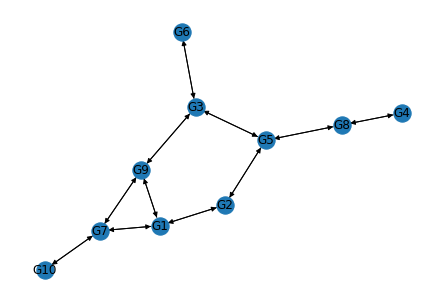

In [33]:
#convert to digraph
#add_edges_from
H_yeast3 = graph_yeast3.to_directed()
print('H edges:', H.edges)
H.add_edge('G3', 'G6')
nx.draw(H, with_labels=True)

In [119]:
# Load the benchmark
def load_benchmark_to_dataframe_yeast3():
    # load the data into a dataframe:
    benchmark_df = pd.read_csv('DREAM3GoldStandard_InSilicoSize10_Yeast3.txt', sep='\t', header=None)
    benchmark_df = benchmark_df.loc[benchmark_df[2] == 1]
    return benchmark_df

# Load the benchmark
def load_benchmark_to_dataframe_yeast2():
    # load the data into a dataframe:
    benchmark_df = pd.read_csv('DREAM3GoldStandard_InSilicoSize10_Yeast2.txt', sep='\t', header=None)
    benchmark_df = benchmark_df.loc[benchmark_df[2] == 1]
    return benchmark_df

# Load the benchmark
def load_benchmark_to_dataframe_yeast2():
    # load the data into a dataframe:
    benchmark_df = pd.read_csv('DREAM3GoldStandard_InSilicoSize10_Yeast1.txt', sep='\t', header=None)
    benchmark_df = benchmark_df.loc[benchmark_df[2] == 1]
    return benchmark_df

# Load the benchmark
def load_benchmark_to_dataframe_yeast1():
    # load the data into a dataframe:
    benchmark_df = pd.read_csv('DREAM3GoldStandard_InSilicoSize10_Yeast1.txt', sep='\t', header=None)
    benchmark_df = benchmark_df.loc[benchmark_df[2] == 1]
    return benchmark_df

# Load the benchmark
def load_benchmark_to_dataframe_ecoli2():
    # load the data into a dataframe:
    benchmark_df = pd.read_csv('DREAM3GoldStandard_InSilicoSize10_Ecoli2.txt', sep='\t', header=None)
    benchmark_df = benchmark_df.loc[benchmark_df[2] == 1]
    return benchmark_df

# Load the benchmark
def load_benchmark_to_dataframe_ecoli1():
    # load the data into a dataframe:
    benchmark_df = pd.read_csv('DREAM3GoldStandard_InSilicoSize10_Ecoli1.txt', sep='\t', header=None)
    benchmark_df = benchmark_df.loc[benchmark_df[2] == 1]
    return benchmark_df
    
benchmark_df_yeast3 = load_benchmark_to_dataframe_yeast3()
benchmark_df_yeast3

benchmark_df_yeast2 = load_benchmark_to_dataframe_yeast2()
benchmark_df_yeast2

benchmark_df_yeast1 = load_benchmark_to_dataframe_yeast1()
benchmark_df_yeast1

benchmark_df_ecoli2 = load_benchmark_to_dataframe_ecoli2()
benchmark_df_ecoli2

benchmark_df_ecoli1 = load_benchmark_to_dataframe_ecoli1()
benchmark_df_ecoli1

,0,1,2
0,G2,G1,1
1,G2,G3,1
2,G3,G4,1
3,G9,G4,1
4,G3,G5,1
5,G8,G5,1
6,G9,G5,1
7,G3,G6,1
8,G3,G7,1
9,G8,G7,1


[[0 0 1 1 1 1 1 0 0 0]
 [0 0 0 1 0 0 0 1 0 1]
 [1 0 0 1 0 1 0 1 0 0]
 [1 1 1 0 1 1 0 1 0 0]
 [1 0 0 1 0 1 0 0 0 0]
 [1 0 1 1 1 0 1 1 1 1]
 [1 0 0 0 0 1 0 0 0 0]
 [0 1 1 1 0 1 0 0 1 1]
 [0 0 0 0 0 1 0 1 0 1]
 [0 1 0 0 0 1 0 1 1 0]]


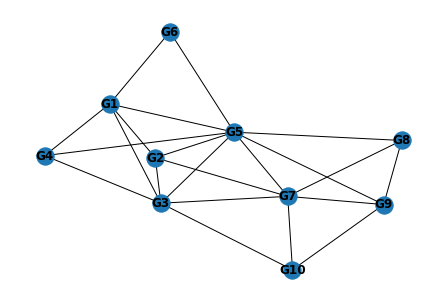

In [120]:
import matplotlib.pyplot as plt

benchmark_graph_yeast3 = nx.Graph()

for i in (1,10):
    benchmark_graph_yeast3.add_node('G'+str(i))

for row in range(0,benchmark_df_yeast3.shape[0]):
    benchmark_graph_yeast3.add_edge(benchmark_df_yeast3[0][row], benchmark_df_yeast3[1][row])

nx.draw(benchmark_graph_yeast3, with_labels=True, font_weight='bold')

benchmark_adjMatrix_yeast3 = nx.adjacency_matrix(benchmark_graph_yeast3)

print(benchmark_adjMatrix_yeast3.todense())

[[0 0 1 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


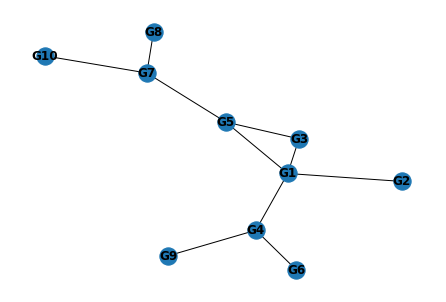

In [121]:
benchmark_graph_yeast2 = nx.Graph()

for i in (1,10):
    benchmark_graph_yeast2.add_node('G'+str(i))

for row in range(0,benchmark_df_yeast2.shape[0]):
    benchmark_graph_yeast2.add_edge(benchmark_df_yeast2[0][row], benchmark_df_yeast2[1][row])

nx.draw(benchmark_graph_yeast2, with_labels=True, font_weight='bold')

benchmark_adjMatrix_yeast2 = nx.adjacency_matrix(benchmark_graph_yeast2)

print(benchmark_adjMatrix_yeast2.todense())

[[0 0 1 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0]]


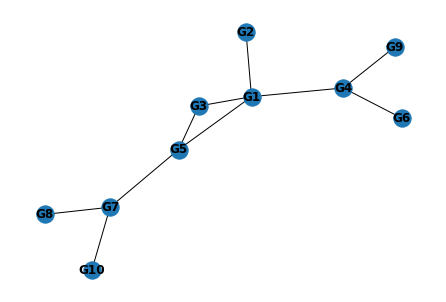

In [122]:
benchmark_graph_yeast1 = nx.Graph()

for i in (1,10):
    benchmark_graph_yeast1.add_node('G'+str(i))

for row in range(0,benchmark_df_yeast1.shape[0]):
    benchmark_graph_yeast1.add_edge(benchmark_df_yeast1[0][row], benchmark_df_yeast1[1][row])

nx.draw(benchmark_graph_yeast1, with_labels=True, font_weight='bold')

benchmark_adjMatrix_yeast1 = nx.adjacency_matrix(benchmark_graph_yeast1)

print(benchmark_adjMatrix_yeast1.todense())

[[0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0]
 [1 1 1 0 1 0 1 1 1 1]
 [1 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0]]


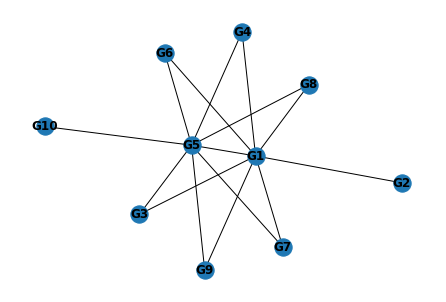

In [123]:
benchmark_graph_ecoli2 = nx.Graph()

for i in (1,10):
    benchmark_graph_ecoli2.add_node('G'+str(i))

for row in range(0,benchmark_df_ecoli2.shape[0]):
    benchmark_graph_ecoli2.add_edge(benchmark_df_ecoli2[0][row], benchmark_df_ecoli2[1][row])

nx.draw(benchmark_graph_ecoli2, with_labels=True, font_weight='bold')

benchmark_adjMatrix_ecoli2 = nx.adjacency_matrix(benchmark_graph_ecoli2)

print(benchmark_adjMatrix_ecoli2.todense())

[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 1]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 1 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 1 0 0]]


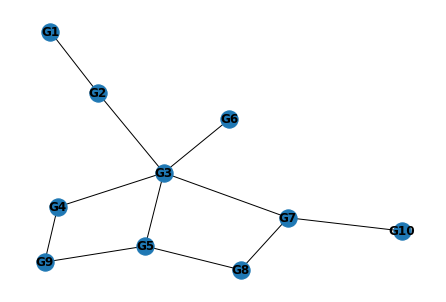

In [124]:
benchmark_graph_ecoli1 = nx.Graph()

for i in (1,10):
    benchmark_graph_ecoli1.add_node('G'+str(i))

for row in range(0,benchmark_df_ecoli1.shape[0]):
    benchmark_graph_ecoli1.add_edge(benchmark_df_ecoli1[0][row], benchmark_df_ecoli1[1][row])

nx.draw(benchmark_graph_ecoli1, with_labels=True, font_weight='bold')

benchmark_adjMatrix_ecoli1 = nx.adjacency_matrix(benchmark_graph_ecoli1)

print(benchmark_adjMatrix_ecoli1.todense())

In [126]:
y_test_yeast3 = benchmark_adjMatrix_yeast3.todense().flatten()
y_pred_yeast3 = predicted_adjMatrix_yeast3.todense().flatten()

y_pred_yeast3 = numpy.asarray(y_pred_yeast3)
y_test_yeast3 = numpy.asarray(y_test_yeast3)

y_pred_yeast3 = y_pred_yeast3.reshape(y_pred_yeast3.shape[1],)
y_test_yeast3 = y_test_yeast3.reshape(y_test_yeast3.shape[1],)

In [127]:
cm_yeast3 = ConfusionMatrix(y_test_yeast3, y_pred_yeast3)
# cm.relabel(mapping=classdict)
print(cm_yeast3.ACC_Macro)

0.66


In [128]:
y_test_yeast2 = benchmark_adjMatrix_yeast2.todense().flatten()
y_pred_yeast2 = predicted_adjMatrix_yeast2.todense().flatten()
y_pred_yeast2 = numpy.asarray(y_pred_yeast2)
y_test_yeast2 = numpy.asarray(y_test_yeast2)
y_pred_yeast2 = y_pred_yeast2.reshape(y_pred_yeast2.shape[1],)
y_test_yeast2 = y_test_yeast2.reshape(y_test_yeast2.shape[1],)


y_test_yeast1 = benchmark_adjMatrix_yeast1.todense().flatten()
y_pred_yeast1 = predicted_adjMatrix_yeast1.todense().flatten()
y_pred_yeast1 = numpy.asarray(y_pred_yeast1)
y_test_yeast1 = numpy.asarray(y_test_yeast1)
y_pred_yeast1 = y_pred_yeast1.reshape(y_pred_yeast1.shape[1],)
y_test_yeast1 = y_test_yeast1.reshape(y_test_yeast1.shape[1],)

y_test_ecoli1 = benchmark_adjMatrix_ecoli1.todense().flatten()
y_pred_ecoli1 = predicted_adjMatrix_ecoli1.todense().flatten()
y_pred_ecoli1 = numpy.asarray(y_pred_ecoli1)
y_test_ecoli1 = numpy.asarray(y_test_ecoli1)
y_pred_ecoli1 = y_pred_ecoli1.reshape(y_pred_ecoli1.shape[1],)
y_test_ecoli1 = y_test_ecoli1.reshape(y_test_ecoli1.shape[1],)

y_test_ecoli2 = benchmark_adjMatrix_ecoli2.todense().flatten()
y_pred_ecoli2 = predicted_adjMatrix_ecoli2.todense().flatten()
y_pred_ecoli2 = numpy.asarray(y_pred_ecoli2)
y_test_ecoli2 = numpy.asarray(y_test_ecoli2)
y_pred_ecoli2 = y_pred_ecoli2.reshape(y_pred_ecoli2.shape[1],)
y_test_ecoli2 = y_test_ecoli2.reshape(y_test_ecoli2.shape[1],)

In [132]:
cm_yeast3 = ConfusionMatrix(y_test_yeast3, y_pred_yeast3)
# cm.relabel(mapping=classdict)
print(cm_yeast3.ACC_Macro)

cm_yeast2 = ConfusionMatrix(y_test_yeast2, y_pred_yeast2)
# cm.relabel(mapping=classdict)
print(cm_yeast2.ACC_Macro)

cm_yeast1 = ConfusionMatrix(y_test_yeast1, y_pred_yeast1)
# cm.relabel(mapping=classdict)
print(cm_yeast1.ACC_Macro)

cm_ecoli1 = ConfusionMatrix(y_test_ecoli1, y_pred_ecoli1)
# cm.relabel(mapping=classdict)
print(cm_ecoli1.ACC_Macro)

cm_ecoli2 = ConfusionMatrix(y_test_ecoli2, y_pred_ecoli2)
# cm.relabel(mapping=classdict)
print(cm_ecoli2.ACC_Macro)

0.66
0.6
0.74
0.72
0.64
